<a href="https://colab.research.google.com/github/leeds1219/AI_Notes_and_Projects/blob/main/ColabPro_Project_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow downgrade till it works..(version problem executing graph)

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [ ]:
!pip install opencv-python matplotlib gdown tensorflow

In [ ]:
# uninstall tensorflow
! pip uninstall tensorflow

# reinstall tensorflow 2.10.1
! pip install tensorflow==2.10.1

Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
Y
  Successfully uninstalled tensorflow-2.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

# Dataset Download

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#import os
#import zipfile
#os.chdir('/MyDrive/data.zip')

#with zipfile.ZipFile('data.zip', 'r') as zip_ref:
#    zip_ref.extractall('/content')

In [ ]:
import gdown

url = 'https://drive.google.com/u/0/uc?id=1UtkewgHB_tjxEweDsxb4dtfRC4uIByHg&export=download'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From: https://drive.google.com/u/0/uc?id=1UtkewgHB_tjxEweDsxb4dtfRC4uIByHg&export=download
To: /content/data.zip
100%|██████████| 423M/423M [00:04<00:00, 96.7MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

# Create Vocabulary Tokens

In [ ]:
import os
import cv2
import numpy as np
from typing import List
from matplotlib import pyplot as plt

In [ ]:
import tensorflow as tf
# Make word tokens
# the dataset provides intructions
# Removed the capitals since it does not have meanings
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]
# tf.keras.layers.StringLookup(
#    max_tokens=None,
#    num_oov_indices=1,
#    mask_token=None,
#    oov_token='[UNK]',
#    vocabulary=None,
#    idf_weights=None,
#    encoding='utf-8',
#    invert=False,
#    output_mode='int',
#    sparse=False,
#    pad_to_max_tokens=False,
#    **kwargs
#)
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True)

# Check GPU

In [ ]:
# How to use GPU in Colab (Colab Pro)
# open runtime change runtime type to GPU

In [ ]:
# double check if connected to GPU
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# Set Memory Growth
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# Data Loading & Preprocessing

In [ ]:
def load_s1(dir:str) -> List[float]:
# We want to take the path as a str and return the normalized List of float
    Video_Capture = cv2.VideoCapture(dir)
    frames = []
# used opencv to read the video and capture the frames
    for _ in range(int(Video_Capture.get(cv2.CAP_PROP_FRAME_COUNT))):
# ret(a boolean) tells if the reading was successfull(True) or not(False)
        ret, frame = Video_Capture.read()
# changed the video to grayscale save resource
        frame = tf.image.rgb_to_grayscale(frame)
# Cut the mouth part and save since we do not want to use extra resource
# The original LipNet CTC paper used a extract_mouth_batch.py
# To save resource we just cut the lower part of the video
        frames.append(frame[190:236,80:220,:])
    Video_Capture.release()
# normalize the frames
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [ ]:
def load_alignments(dir:str) -> List[str]:
# Same as video
    with open(dir, 'r') as f:
        lines = f.readlines()
# save the tokens here
    tokens = []
# In the labe the lines separate the words in the alignment folder
    for line in lines:
# Split the lines
        line = line.split()
# If sil it has no meaning so remove
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
# char_to_num inputs take a single letter so we have to break the tokens into letters
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [ ]:
def load_data(dir: str):
# we need decoding to use split functions
    dir = bytes.decode(dir.numpy())
# split the directory of the files
    file_name = dir.split('/')[-1].split('.')[0]
# get the video folder which is /content/data/s1/*.mpg
    video_dir = os.path.join('data','s1',f'{file_name}.mpg')
# get the alignments which directory is /content/data/alignments/s1/*.align
    alignment_dir = os.path.join('data','alignments','s1',f'{file_name}.align')
# load them with the function together
# if we separatly load s1 and alignment we have to match them every epoch
    frames = load_s1(video_dir)
    alignments = load_alignments(alignment_dir)
    return frames, alignments

In [ ]:
# A sample to test if the funcitons work
sample_dir = '/content/data/s1/bbaf2n.mpg'

In [ ]:
# Check the type, shape of the to be input tensors
# Frames
frames, alignments = load_data(tf.convert_to_tensor(sample_dir))

In [ ]:
import torch
frames.shape

TensorShape([75, 46, 140, 1])

In [ ]:
alignments.shape

TensorShape([21])

# Create Pipeline

In [ ]:
# For tensorflow we need py_function to use str
def mappable_function(dir:str) ->List[str]:
    result = tf.py_function(load_data, [dir], (tf.float32, tf.int64))
    return result

In [ ]:
# list_files method allow elements of file list to be a independent data
# and shuffles by default /content/data/s1 content is the root no need to specify
data = tf.data.Dataset.list_files('/content/data/s1/*.mpg')
# we can also shuffle the data using .shuffle()
# to save resource turned of shuffling every epoch
data = data.shuffle(500, reshuffle_each_iteration=False)
# {nameofdataset}.map(f) creates a new dataset with the given function f
# we can add data augmentations here such as random rotations, resizing etc
# returns the frames ans alignments
# use frames, alignments = data.as_numpy_iterator().next()
data = data.map(mappable_function)
# .padded_batch(batch_size, padded_shapes=None, padding_values=None, drop_remainder=False)
# the TensorShape([75, 46, 140, 1]) we can see that the frames are 75
# and ensure that there are 40 tokens in the alignments if less padded to zero
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
# preload as the epochs are performed hide Memory latency
# optimize the process!
data = data.prefetch(tf.data.AUTOTUNE)
# split data into training and test
# or training(parameter), validation(hyperparameter) and test # can use cross validations also
# repeat() repeat dataset, batch() define batch size, take() define how many times we call the batch
# Cautions!!! batch().take() and take().batch() is different!!!
# skip(n) this splits the first n data
train = data.take(450)
# for evaluation
test = data.skip(450)

# Design MyModel

In [ ]:
# Check the input shape keep this!
# tensor shape problems!!!
#data.as_numpy_iterator().next()[0][0].shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, BatchNormalization, Activation, MaxPool3D, TimeDistributed, Flatten, Bidirectional, LSTM, Dropout, Dense
model = Sequential()

# AttentionLayer ... Need to study a bit more ...
#class AttentionLayer(tf.keras.layers.Layer):
#    def __init__(self):
#        super(AttentionLayer, self).__init()

 #   def build(self, input_shape):
 #       # Define the trainable weights for the attention mechanism, such as the attention scores.
 #       # You can use Dense layers or any other mechanism to compute attention scores.
 #       self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform")
 #       self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform")
 #       self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="glorot_uniform")
 #       super(AttentionLayer, self).build(input_shape)

 #   def call(self, inputs):
 #       # Calculate attention scores
 #       q = tf.matmul(inputs, self.W_q)
 #       k = tf.matmul(inputs, self.W_k)
 #       attn_scores = tf.matmul(tf.nn.tanh(q + k), self.V)
 #       attn_scores = tf.nn.softmax(attn_scores, axis=1)

        # Apply attention to the input data
 #       output = tf.reduce_sum(inputs * attn_scores, axis=1)

  #      return output

# The Original LipNet paper used Spatial Pooling layer x 3, Bi-GRU x 2, linear x 1 and CTC loss fucntion
# 3D Convolution layers work well when processing videos
# Zero padding: padding = 'same' means to keep the input and output dimension

# Adapted the AlexNet with dropout of 0.5 and batch size of 128
# Activation function: ReLu
# 128 filters with 3x3x3 kernel size followed by relu and maxpooling with (1,2,2) pool size
# batchnorm is most used in conv3d
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization()) # for dying ReLU, faster convergence, smoothout
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
#model.add(BatchNormalization()) # but the model worked even without batchnorm
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

# The original paper used two highway layers
# Since we just want to keep the 75 frames use a TimeDistributed layer and flatten
# Time Distributed Layer: allows to apply a layer to every temporal slice of an input
# In this project, apply a layer to the 75 frames since this is a video
# with 75 frames in a row
model.add(TimeDistributed(Flatten())) # 75 and 5*17*75

# paper used bidirectional LSTM model and a CTC loss function
# LSTM was used in most Language models so why not add it
# The paper used the Orthogonal initializer
# initial Dropout was set to 0.5
# Dropout: prevent overfitting!, or apply batchnorm
model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

# The Best performing paper added an additional attention layer here before the CTC
#model.add(AttentionLayer())

# Last layer to fit the output with the vocabulary, making predictions!
# Could have used graphemes as tokens but the resource limitation...
# to make prediction make the size to the vocab dictionary+1
# Use a He initializer with softmax activation function
model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

# Custom model is like pytorch good for practice

# But the model I made had some training errors with input size

#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Conv3D, Activation, MaxPool3D, TimeDistributed, Flatten, Bidirectional, LSTM, Dropout, Dense

# Attention layer need to check dimesion of model and attention heads
#class AttentionLayer(tf.keras.layers.Layer):
#  def __init__(self, **kwargs):
#    super(AttentionLayer, self).__init__(**kwargs)

#  def build(self, input_shape):
#    self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer='glorot_uniform')
#    self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer='glorot_uniform')
#    self.W_v = self.add_weight(name="W_v", shape=(input_shape[-1], input_shape[-1]), initializer='glorot_uniform')

#  def call(self, x):
#    q = tf.tensordot(x, self.W_q, axes=[-1, 0]) # Query
#    k = tf.tensordot(x, self.W_k, axes=[-1, 0]) # Key
#    v = tf.tensordot(x, self.W_v, axes=[-1, 0]) # Value

#    attn_logits = tf.matmul(q, k, transpose_b=True)
#    attn_logits = tf.nn.softmax(attn_logits, axis=-1)
#    output = tf.matmul(attn_logits, v)
#    return output

# The Original LipNet paper used Spatial Pooling layer x 3, Bi-GRU x 2, linear x 1 and CTC loss fucntion
#class MyLipReadModel(Model):
#  def __init__(self, input_shape, vocabulary_size, **kwargs):
#    super(MyLipReadModel, self).__init__(**kwargs)

# Conv3D layers to process video data type
#    self.conv1 = Conv3D(128, 3, padding='same', input_shape=input_shape)
#    self.relu1 = Activation('relu')
#    self.maxpool1 = MaxPool3D((1, 2, 2))

#    self.conv2 = Conv3D(256, 3, padding='same')
#    self.relu2 = Activation('relu')
#    self.maxpool2 = MaxPool3D((1, 2, 2))
#
#    self.conv3 = Conv3D(75, 3, padding='same')
#    self.relu3 = Activation('relu')
#    self.maxpool3 = MaxPool3D((1, 2, 2))

# The original paper used two highway layers
# Since we just want to keep the 75 frames use a TimeDistributed layer and flatten
    #self.time_dist = TimeDistributed(Flatten())

# paper used bidirectional LSTM model and a CTC loss function
# LSTM was used in most Language models so why not add it
# The paper used the Orthogonal initializer
# initial Dropout was set to 0.5
#    self.lstm1 = Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True))
#    self.dropout1 = Dropout(0.5)

#    self.lstm2 = Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True))
#    self.dropout2 = Dropout(0.5)

# The Best performing paper added an additional attention layer here before the CTC
# atten1 75x28
#    self.attention = AttentionLayer()

#    self.dense = Dense(vocabulary_size + 1, kernel_initializer='he_normal', activation='softmax')

# Perform forwards
#  def call(self, inputs):
#    x = self.conv1(inputs)
#    x = self.relu1(x)
#    x = self.maxpool1(x)

#    x = self.conv2(x)
#    x = self.relu2(x)
#    x = self.maxpool2(x)

#    x = self.conv3(x)
#    x = self.relu3(x)
#    x = self.maxpool3(x)

#   x = self.time_dist(x)

#    x = self.lstm1(x)
#    x = self.dropout1(x)

#    x = self.lstm2(x)
#    x = self.dropout2(x)

#    x=self.attention(x)

#    output = self.dense(x)
#    return output

#  def summary(self):
#    model = Model(inputs = x, outputs = self.call(x))
#    return model.summary()

#input_shape = (75, 46, 140, 1)
#vocabulary_size = char_to_num.vocabulary_size()

#mymodel = MyLipReadModel(input_shape, vocabulary_size)
#mymodel.summary()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [ ]:
# Make a sample to see error in mymodel
# Use as_numpy_iterator to inspect the content of your dataset.
# To see element shapes and types,
# print dataset elements directly instead of using as_numpy_iterator.
sample = data.as_numpy_iterator()

In [ ]:
val = sample.next()

In [ ]:
# 2 batch each frames and alignments and input shape 75 46 140 1
val[0].shape

(2, 75, 46, 140, 1)

In [ ]:
y_predict_sample = model.predict(val[0])

1/1 [==============================] - 11s 11s/step


In [ ]:
y_predict_sample.shape

(2, 75, 41)

In [ ]:
# Read the char of each frame!
[num_to_char(x) for x in tf.argmax(y_predict_sample[0],axis=1)]

[<tf.Tensor: shape=(), dtype=string, numpy=b'y'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'y'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'y'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'y'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'y'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: shape=(), dtype=string, numpy=b''>,
 <tf.Tensor: sh

# Training Strategy

In [ ]:
import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
# Learning rate schedular
# Step Decay
#def step_decay(epoch):
#    start = 0.1
#    drop = 0.5
#    epochs_drop = 5.0
#    lr = start * (drop ** np.floor((epoch)/epochs_drop))
#    return lr
#model = Sequential([Dense(10)])
#model.compile(optimizer=SGD(), loss='mse')
#lr_scheduler = LearningRateScheduler(step_decay, verbose=1)
#history = model.fit(np.arange(10).reshape(10, -1), np.zeros(10),
#                    epochs=10, callbacks=[lr_scheduler], verbose=0)
# Cosine Decay
#cos_decay = tf.keras.experimental.CosineDecay(initial_learning_rate=0.001, decay_steps=50, alpha=0.001)
#model = Sequential([Dense(10)])
#model.compile(optimizer=SGD(cos_decay), loss='mse')
#lr_scheduler = LearningRateScheduler(cos_decay, verbose=1)
#history = model.fit(np.arange(10).reshape(10, -1), np.zeros(10),
#                    epochs=10, verbose=0)
# Cosine Decay Annealling
#cos_decay_ann = tf.keras.experimental.CosineDecayRestarts(initial_learning_rate=0.1, first_decay_steps=10, t_mul=1, m_mul=0.9, alpha=0)
#model = Sequential([Dense(10)])
#model.compile(optimizer=SGD(learning_rate=cos_decay_ann), loss='mse')
#history = model.fit(np.arange(10).reshape(10, -1), np.zeros(10),
#                    epochs=10, verbose=0)
# PyTorch LRs
# ExponetialLR
#optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
#scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)
#import torch
#import torch.nn as nn
#import torch.optim as optim
#from data import AudioDataset, AudioDataLoader
#from matplotlib import pyplot as plt

#class Model(nn.Module):
#    def __init__(self):
#        super(Model, self).__init__()
#        self.linear = nn.Linear(10, 10)
#        self.activation = nn.ReLU()
#    def forward(self, x):
#        return self.activation(self.linear1(x))

# data
#tr_dataset = AudioDatset('tr')
#data_loader = AudioDataLoader(tr_dataset, batch_size=3, shuffle=1)
# model
#model = Model()
# loss
#loss = nn.MSELoss()
# optimizer
#optimizer = optim.Adam(model.parameters(), lr=1e-3)
#scheduler
#scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer,
#                                        lr_lambda=lambda epoch: 0.95 ** epoch,
#                                        last_epoch=-1,
#                                        verbose=False)
#epochs=100
#for epoch in range(epochs):
#    for i, (data) in enumerate(data_loader):
#        x_data, y_data = data
#        optimizer.zero_grad()

#        estimated_y = model(x_data)
#        loss = loss(y_data, estimated_y)
#        loss.backward()
#        optimizer.step()
#    scheduler.step() # you can set it like this!
# Cosine annealing
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
#scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50, eta_min=0)
#Started with exp and change if it doesn't work scheduler itself doesnot matter much
def expLRscheduler(epoch, lr):
    if epoch < 40:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [ ]:
# For Loss Function almost every article selected CTC loss at the end
# Automatic Speech Recognition using CTC article
# Used ctc loss function from the article
# The article function is for audio we put video here

def CTCLoss(y_true, y_pred):
#tf.cast(x, dtype, name=None) casts a tensor to a new type
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

# y_true = alignments, y_pred = predictions, input_length = 75 frames, label_length = 40 vocab
# Defined in tensorflow/python/keras/backend.py.
# Runs CTC loss algorithm on each batch element.
    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [ ]:
# ctc_decode()
#tf.keras.backend.ctc_decode(
#    y_pred,
#    input_length,
#    greedy=True,
#    beam_width=100,
#    top_paths=1
#)
# Defined in tensorflow/python/keras/_impl/keras/backend.py.
# Decodes the output of a softmax.
class ReadPrediction(tf.keras.callbacks.Callback):
  def __init__(self, dataset) -> None:
    self.dataset = dataset.as_numpy_iterator()
# Keras callbacks use on_epoch_end to specify what should happen at the end of each epoch
  def on_epoch_end(self, epoch, logs = None):
    data = self.dataset.next()
    y_predict=self.model.predict(data[0])
    decode = tf.keras.backend.ctc_decode(y_predict, [75, 75], greedy = False)[0][0].numpy()
    for i in range(len(y_predict)):
# tf.strings.reduce_join Joins all strings into a single str
#tf.strings.reduce_join(
#    inputs, axis=None, keepdims=False, separator='', name=None
#)
      print(tf.strings.reduce_join(num_to_char(data[1][i])).numpy().decode('utf-8'))
      print(tf.strings.reduce_join(num_to_char(decode[i])).numpy().decode('utf-8'))

In [ ]:
# compile example: mymodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = CTCLoss)

In [ ]:
# save the model in model folder and save weights
# Create the "model" directory if it doesn't exist
#if not os.path.exists('model'):
#    os.makedirs('model')

# Create the "checkpoint" directory within the "model" directory if it doesn't exist
#if not os.path.exists(os.path.join('model', 'checkpoint')):
#    os.makedirs(os.path.join('model', 'checkpoint'))

checkpoint_callback = ModelCheckpoint(os.path.join('model','checkpoint'), monitor = 'loss', save_weights_only = True)

In [ ]:
schedule_callback = LearningRateScheduler(expLRscheduler)

In [ ]:
example_callback = ReadPrediction(data)

In [ ]:
torch.cuda.is_available()

True

# Training(Had colab runtime issues)

In [ ]:
#Step 1: Check initial loss ​

#Step 2: Overfit a small sample ​

#Step 3: Find LR that makes loss go down ​

#Step 4: Coarse grid, train for ~1-5 epochs ​

#Step 5: Refine grid, train longer ​

#Step 6: Look at loss curves​

#Step 7: GOTO step 5

In [ ]:
# model.fit(train, epochs = 100, callbacks = [checkpoint_callback, schedule_callback, example_callback])

In [ ]:
#print(tf.__version__)

In [ ]:
# model.fit(train, epochs = 100, callbacks = [schedule_callback, example_callback])

In [ ]:
# fit method
#model.fit(train, epochs = 100)

# should have added validation data...

# Saving Weights(runtime issues had to save weights)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#import shutil

# Source directory
#source_dir = "model"

# Destination directory in your Google Drive
#destination_dir = "/content/drive/MyDrive/model"

# Copy the source directory to your Google Drive
#shutil.copytree(source_dir, destination_dir)

In [ ]:
#from google.colab import files

# Path to the model files in your Colab environment
#model_path = '/content/model/checkpoint'  # Update this path to the actual model directory

# Compress the model directory into a ZIP file
#shutil.make_archive("/content/model", 'zip', model_path)

# Download the ZIP file to your local desktop
#files.download("/content/model.zip")

In [ ]:
# model.save_weights("my_model_weights.h5")

In [ ]:
# from google.colab import files

#files.download("my_model_weights.h5")

In [ ]:
# model.save("my_model")

In [ ]:
#from google.colab import files
#!zip -r my_model.zip mymodel

#files.download("my_model.zip")

# Evaluation of the model


In [ ]:
import gdown
url = 'https://drive.google.com/u/0/uc?id=1cQmEDyTDllxVzsOOV847EOsF_WrJ8Mes&export=download'
output = 'checkpoints.zip'

gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From: https://drive.google.com/u/0/uc?id=1cQmEDyTDllxVzsOOV847EOsF_WrJ8Mes&export=download
To: /content/checkpoints.zip
100%|██████████| 94.5M/94.5M [00:01<00:00, 68.8MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [ ]:
print(tf.__version__)

2.10.1


In [ ]:
model.load_weights('models/checkpoint')

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
sample = test_data.next()

In [ ]:
y_prediction = model.predict(sample[0])

1/1 [==============================] - 4s 4s/step


In [ ]:
y_prediction.shape

(2, 75, 41)

In [ ]:
sample[1].shape

(2, 40)

In [ ]:
# The GT transcript
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

[<tf.Tensor: shape=(), dtype=string, numpy=b'bin green at n four nowbin white by h one again'>]

In [ ]:
# Prediction
decoded_sample_prediction = tf.keras.backend.ctc_decode(y_prediction, input_length = [75, 75], greedy = True)[0][0].numpy()

In [ ]:
# The Predicted transcript
# well... it didn't predict very well
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded_sample_prediction]

[<tf.Tensor: shape=(), dtype=string, numpy=b'bin green at n four now'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'bin white by h one again'>]

In [ ]:
test

<SkipDataset element_spec=(TensorSpec(shape=(None, 75, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 40), dtype=tf.int64, name=None))>

In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize empty lists to store predictions and true labels
all_predictions = []
all_labels = []

# 'test' is a SkipDataset
for video_frames, alignments in test:
    # Make predictions on the video frames
    predictions = model.predict(video_frames)
    # Append the predictions and true labels to the lists
    all_predictions.append(predictions)
    all_labels.append(alignments)

1/1 [==============================] - 0s 176ms/step


In [ ]:
all_predictions[0].shape

(2, 75, 41)

In [ ]:
len(all_predictions)

50

In [ ]:
decoded_sample_prediction = tf.keras.backend.ctc_decode(all_predictions[0], input_length = [75, 75], greedy = True)[0][0].numpy()

In [ ]:
decoded_text = tf.strings.reduce_join([num_to_char(word) for word in decoded_sample_prediction]).numpy().decode('utf-8')

In [ ]:
decoded_text

'bin green with b six pleaseset white by v four please'

In [ ]:
decoded_predictions_list = []

for i in range(len(all_predictions)) :
  decoded_sample_prediction = tf.keras.backend.ctc_decode(all_predictions[i], input_length = [75, 75], greedy = True)[0][0].numpy()
  decoded_text = tf.strings.reduce_join([num_to_char(word) for word in decoded_sample_prediction]).numpy().decode('utf-8')
  decoded_predictions_list.append(decoded_text)


In [ ]:
# decoded_predictions_list contains the predicted transcripts
# now the alignments

In [ ]:
all_labels[0].shape

TensorShape([2, 40])

In [ ]:
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [all_labels[0]]]

[<tf.Tensor: shape=(), dtype=string, numpy=b'bin green with b six pleaseset white by v four please'>]

In [ ]:
decoded_GT_list = []

for i in range(len(all_labels)):
    decoded_GT = [tf.strings.reduce_join([num_to_char(word) for word in sentence]).numpy().decode('utf-8') for sentence in all_labels[i]]
    decoded_GT_list.append(decoded_GT)

In [ ]:
decoded_GT_list[0]

['bin green with b six please', 'set white by v four please']

In [ ]:
concatenated_decoded_GT_list = []

for i in range(len(decoded_GT_list)) :
  concatenated_decoded_GT = [''.join(decoded_GT_list[i])]
  concatenated_decoded_GT_list.append(concatenated_decoded_GT)

In [ ]:
concatenated_decoded_GT_list[0]

['bin green with b six pleaseset white by v four please']

In [ ]:
concatenated_decoded_GT_list[0][0]

'bin green with b six pleaseset white by v four please'

In [ ]:
GT_transcript_list = []

for i in range(len(concatenated_decoded_GT_list)) :
  GT_transcript = concatenated_decoded_GT_list[i][0]
  GT_transcript_list.append(GT_transcript)

In [ ]:
GT_transcript_list[0]

'bin green with b six pleaseset white by v four please'

In [ ]:
len(decoded_GT_list)

50

In [ ]:
len(decoded_predictions_list)

50

In [ ]:
decoded_predictions_list[0]

'bin green with b six pleaseset white by v four please'

In [ ]:
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.4 MB/s eta 0:00:00


In [ ]:
import jiwer

# Assuming ground_truth is a list of ground truth transcriptions
# GT_transcript_list

# Convert decoded predictions to text
# decoded_predictions_list

# Calculate Word Error Rate
wer = jiwer.wer(GT_transcript_list, decoded_predictions_list)

print("Word Error Rate: {:.2%}".format(wer))


Word Error Rate: 2.72%


# Quilitative evaluation

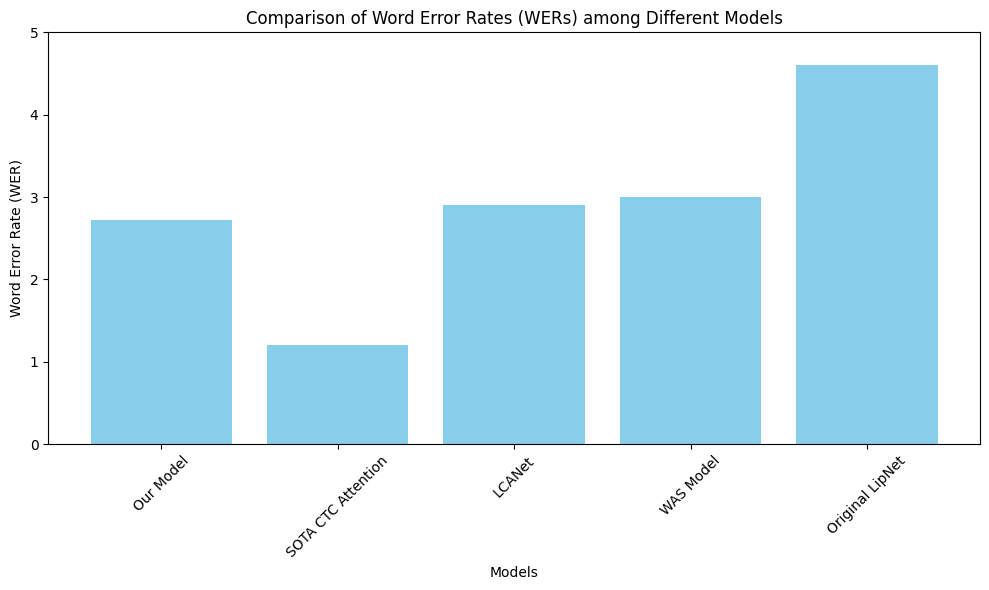

In [1]:
import matplotlib.pyplot as plt

models = ['Our Model', 'SOTA CTC Attention', 'LCANet', 'WAS Model', 'Original LipNet']
WERs = [2.72, 1.20, 2.90, 3.00, 4.60]

plt.figure(figsize=(10, 6))
plt.bar(models, WERs, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Word Error Rate (WER)')
plt.title('Comparison of Word Error Rates (WERs) among Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Adjust the y-axis limits if needed
plt.tight_layout()
plt.show()

In [ ]:
# check for the generalization